# Урок 2. Обзор основных алгоритмов машинного обучения, используемых в соревнованиях

В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.

Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing

**Задание 1:** отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 2:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

**Задание 4:** для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 5:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

**Задание 6:** обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

**Задание 7:** для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 8:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

**Задание 9:** обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

**Задание 10:** построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.


## Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

**Задание 1:** Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

**Задание 2:** построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

**Задание 3:** построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

**Задание 4:** построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.


В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.

Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing


In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import seaborn as sns
import scipy.stats as st

import warnings
warnings.simplefilter("ignore")

In [2]:
train_df = pd.read_csv('./assignment2_data/assignment_2_train.csv')
test_df = pd.read_csv('./assignment2_data/assignment_2_test.csv')

In [3]:
print("train.shape = {} rows, {} cols".format(*train_df.shape))
print("test.shape = {} rows, {} cols".format(*test_df.shape))

train.shape = 180000 rows, 394 cols
test.shape = 100001 rows, 394 cols


Расмотрим, для начала, что из себя представляет датасет.

In [4]:
test_df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,1,7415038,226.00,W,12473,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,0,7415054,3072.00,W,15651,417.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3287002,0,7415081,319.95,W,13844,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test_df['isFraud'].value_counts()

0    96197
1     3804
Name: isFraud, dtype: int64

In [6]:
train_df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_df['isFraud'].value_counts()

0    174859
1      5141
Name: isFraud, dtype: int64

Выборки что на обучении, что на тесте не сбалансированы. При обучении скорее всего придется отдельно выполнять баласировку. 

In [8]:
train_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.800000e+05,180000.000000,1.800000e+05,180000.000000,180000.000000,177389.000000,179997.000000,179047.000000,160567.000000,160567.000000,...,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000
mean,3.077000e+06,0.028561,1.909818e+06,129.514237,9860.225806,368.326897,153.410374,200.363089,291.160444,86.559903,...,0.137074,74.962242,99.220468,85.778161,8.326725,18.404676,12.437524,26.798593,32.005349,28.492421
std,5.196167e+04,0.166570,1.039029e+06,206.515032,4910.778205,158.952840,11.529483,40.585532,102.250385,3.958070,...,0.642444,545.161980,668.223140,577.072150,84.616132,120.896921,99.305885,252.695682,284.870583,258.372941
min,2.987000e+06,0.000000,8.640000e+04,0.292000,1001.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.032000e+06,0.000000,1.091681e+06,44.000000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.077000e+06,0.000000,1.884075e+06,75.000000,9633.000000,375.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.121999e+06,0.000000,2.693196e+06,125.000000,14182.000000,514.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.166999e+06,1.000000,3.958317e+06,5278.950000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,15.000000,20750.000000,32250.000000,21250.000000,3100.000000,3350.000000,3250.000000,8250.000000,8250.000000,8250.000000


In [9]:
# msno.matrix(train_df)
# plt.show()

В наборе данных имеется большое к-во пропщенных значений. 

## Задание 1:
 Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

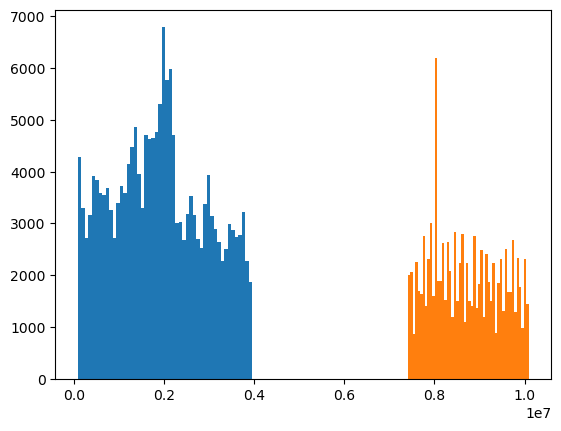

In [10]:
plt.hist(train_df['TransactionDT'], 50)
plt.hist(test_df['TransactionDT'], 50)
plt.show()

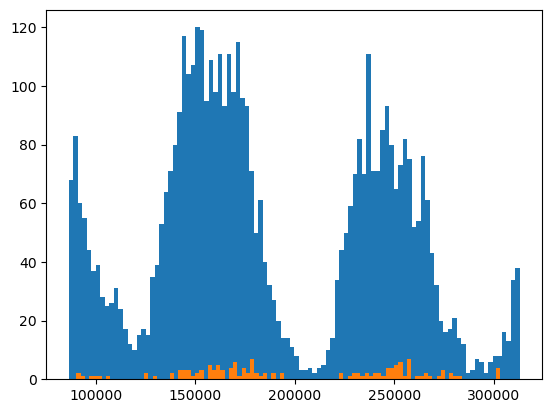

In [11]:
plt.hist(train_df.loc[((train_df['isFraud']==0) & (train_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.hist(train_df.loc[((train_df['isFraud']==1) &  (train_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.show()

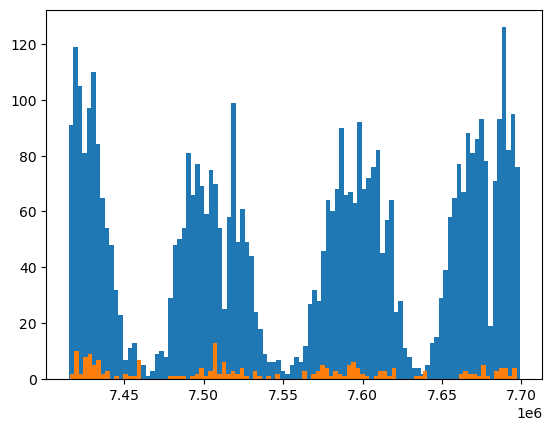

In [12]:
plt.hist(test_df.loc[((test_df['isFraud']==0) & (test_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.hist(test_df.loc[((test_df['isFraud']==1) &  (test_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.show()

## Задание 2:
построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

In [13]:
# TransactionAmt - сумма транзакции.
# TransactionDT - дата/время транзакции.

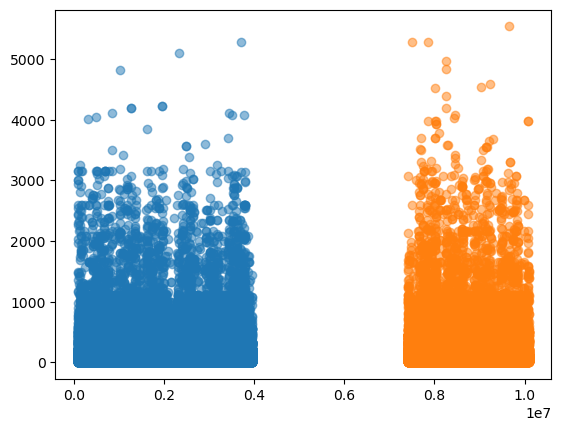

In [14]:
plt.scatter(train_df['TransactionDT'], train_df['TransactionAmt'], alpha=0.5)
plt.scatter(test_df['TransactionDT'], test_df['TransactionAmt'], alpha=0.5)
plt.show()

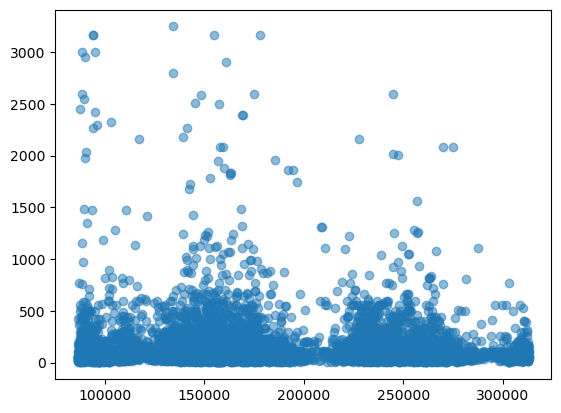

In [15]:
plt.scatter(train_df['TransactionDT'][:10000], train_df['TransactionAmt'][:10000], alpha=0.5)
plt.show()

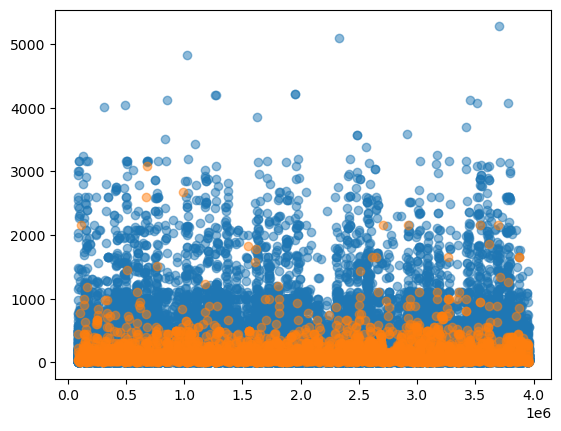

In [16]:
plt.scatter(train_df.loc[(train_df['isFraud']==0,'TransactionDT')],
            train_df.loc[(train_df['isFraud']==0,'TransactionAmt')], alpha=0.5)
plt.scatter(train_df.loc[(train_df['isFraud']==1,'TransactionDT')],
            train_df.loc[(train_df['isFraud']==1,'TransactionAmt')], alpha=0.5)
plt.show()

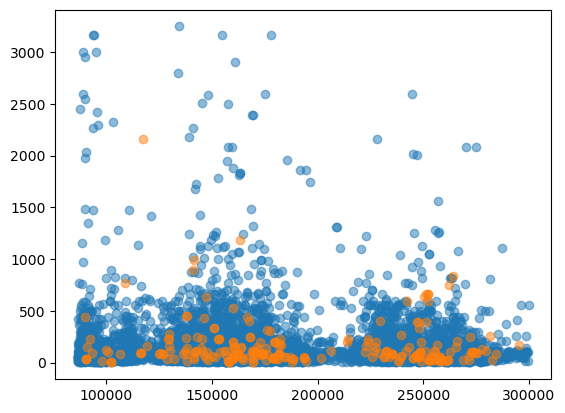

In [17]:
plt.scatter(train_df.loc[((train_df['isFraud']==0) & (train_df['TransactionDT']< 300000),'TransactionDT')],
            train_df.loc[((train_df['isFraud']==0) &  (train_df['TransactionDT']< 300000),'TransactionAmt')], alpha=0.5)
plt.scatter(train_df.loc[((train_df['isFraud']==1) &  (train_df['TransactionDT']< 300000),'TransactionDT')],
            train_df.loc[((train_df['isFraud']==1) &  (train_df['TransactionDT']< 300000),'TransactionAmt')], alpha=0.5)
plt.show()

Видно, что суммы транзакций имеют периодических характер во времени. К-во мошейнеческих транзакций также менятес с тесчением времени вцелом повторя динамику обычных. 

Если судить по графику, суммы мошейнеческих транзакций в целом вдое ниже чем суммы оычных. 

так если большая часть транзакций прнимает значение чуть больше 1000 у.е. , то мошейнеческие транзакции соврешаются на сумму до 500 у.е. 

## Задание 3:
 построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.


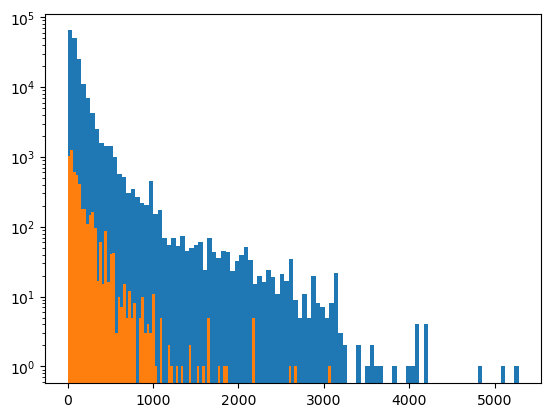

In [18]:
plt.hist(train_df.loc[(train_df['isFraud']==0, 'TransactionAmt') ], bins=100)
plt.hist(train_df.loc[(train_df['isFraud']==1, 'TransactionAmt') ], bins=100)
plt.yscale('log')
plt.show()

## Задание 4:
 построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

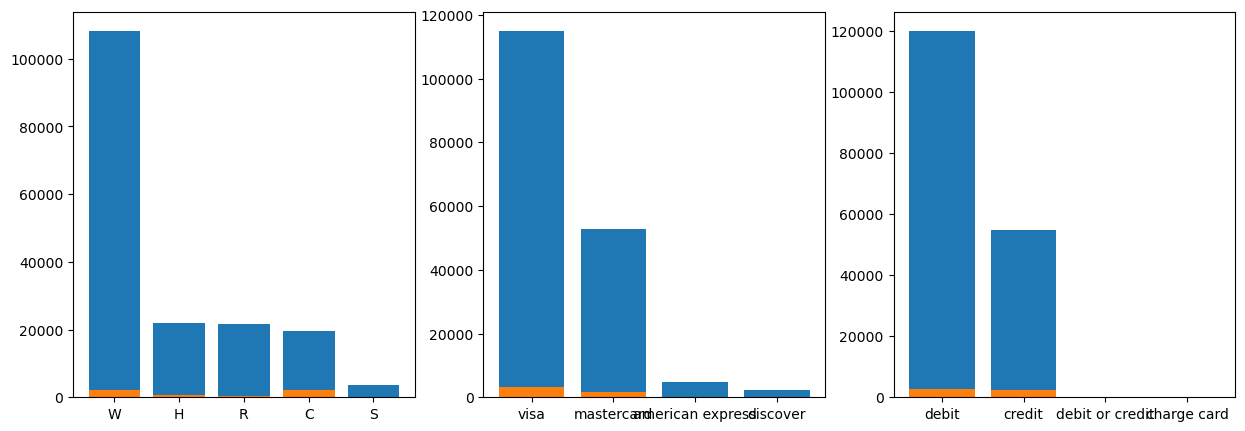

In [19]:
features = ['ProductCD', 'card4', 'card6']
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, feature in enumerate(features):
    values_list = train_df.loc[(train_df['isFraud']==0, feature)].value_counts()
    ax[i].bar( values_list.index, values_list.values)
    values_list = train_df.loc[(train_df['isFraud']==1, feature)].value_counts()
    ax[i].bar(values_list.index, values_list.values)
plt.show()

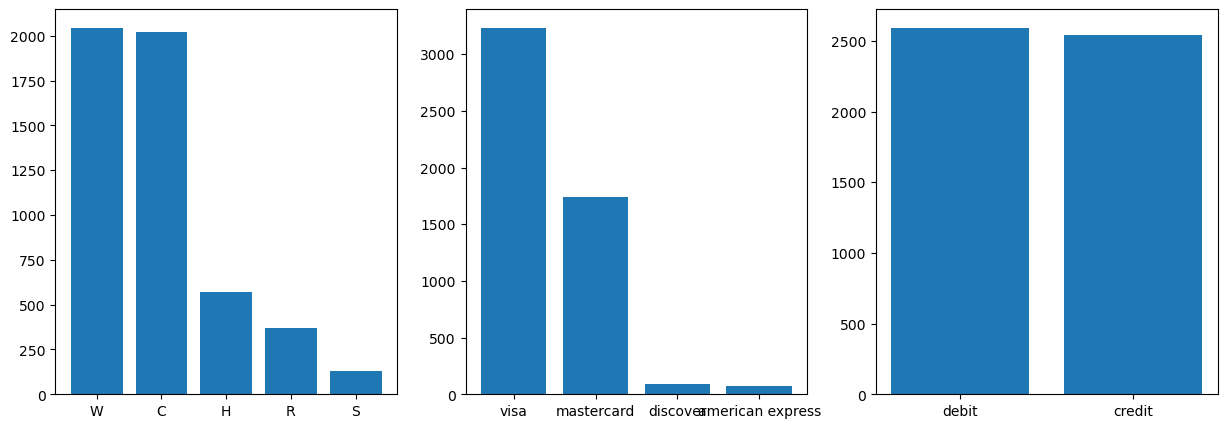

In [20]:
features = ['ProductCD', 'card4', 'card6']
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, feature in enumerate(features):
    values_list = train_df.loc[(train_df['isFraud']==1, feature)].value_counts()
    ax[i].bar(values_list.index, values_list.values)
plt.show()

## Обзор основных алгоритмов машинного обучения, используемых в соревнованиях

## Задание 1:
отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [21]:
y_data_train = train_df['isFraud']
x_data_train = train_df.drop(['isFraud'],axis=1)

y_data_test = test_df['isFraud']
x_data_test = test_df.drop(['isFraud'],axis=1)

In [22]:
# Получим список катероиальных и числовых признаков.

categorical = []
numerical = []
for col, value in x_data_train.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)

In [23]:
x_data_train[categorical].head(5)

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
x_train = x_data_train[numerical]
y_train = y_data_train

x_valid = x_data_test[numerical]
y_valid = y_data_test

In [25]:
# xgb.DMatrix?

In [26]:
dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)

dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

In [27]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    # "n_estimators": 10000,
    "reg_lambda": 50,
    "max_depth": 4,
    "gamma": 4,
    "nthread": 6,
    "seed": 27
}

In [54]:
xgb_model_1 = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=10000,
    early_stopping_rounds=50,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=25,
    maximize=True,
)

[0]	train-auc:0.63401	valid-auc:0.63204
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[25]	train-auc:0.84808	valid-auc:0.82511
[50]	train-auc:0.88692	valid-auc:0.85101
[75]	train-auc:0.89884	valid-auc:0.85417
[100]	train-auc:0.90554	valid-auc:0.85581
[125]	train-auc:0.91011	valid-auc:0.85768
[150]	train-auc:0.91405	valid-auc:0.85835
[175]	train-auc:0.91757	valid-auc:0.85909
[200]	train-auc:0.92032	valid-auc:0.85979
[225]	train-auc:0.92246	valid-auc:0.86069
[250]	train-auc:0.92498	valid-auc:0.86036
[275]	train-auc:0.92682	valid-auc:0.86067
Stopping. Best iteration:
[235]	train-auc:0.92362	valid-auc:0.86085



In [58]:
def draw_roc_auc(model, dtrain, dvalid, y_valid, y_train):
    y_pred_train = model.predict(dtrain)
    roc_auc_train=roc_auc_score(y_train, y_pred_train)
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_pred_train)

    y_pred_val = model.predict(dvalid)
    roc_auc_val=roc_auc_score(y_valid, y_pred_val)
    fpr_val, tpr_val, _ = metrics.roc_curve(y_valid, y_pred_val)

    plt.plot(fpr_train, tpr_train, 'b',color="blue", label = 'train_auc = %0.2f' % roc_auc_train)
    plt.plot(fpr_val, tpr_val, 'b', color="orange", label = 'val_auc = %0.2f' % roc_auc_val)
    
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

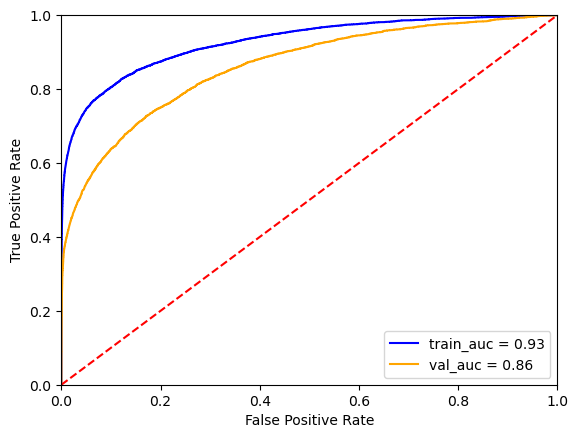

In [59]:
draw_roc_auc(xgb_model_1, dtrain, dvalid, y_valid, y_train)

In [ ]:
# Построить ROC-AUC кривую.

## Задание 2:
обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

Приведем категориалные фитчи к числовому виду.

In [45]:
def category_to_digit(df, features):  
    for i, feature in enumerate(features):
        
        values_list = df[feature].value_counts()

        for names in values_list.index:
            df.insert(3, f'{feature}_{names}', np.where((df[feature]==names),1,0), True)
            
    df.drop(features, axis=1, inplace=True)

In [46]:
print(categorical)

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [47]:
features = ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

x_data_train_cat = x_data_train.iloc[:]
x_data_test_cat = x_data_test.iloc[:]

category_to_digit(x_data_train_cat, features)
category_to_digit(x_data_test_cat, features)

# Удалим все категориальные признаки.
x_data_train_cat.drop(['P_emaildomain', 'R_emaildomain'], axis=1, inplace=True)
x_data_test_cat.drop(['P_emaildomain', 'R_emaildomain'], axis=1, inplace=True)

In [48]:
x_data_train_cat.head()

,TransactionID,TransactionDT,TransactionAmt,M9_F,M9_T,M8_T,M8_F,M7_T,M7_F,M6_T,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,86400,68.5,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,86401,29.0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.0,1,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,86499,50.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
x_data_test_cat.head()

,TransactionID,TransactionDT,TransactionAmt,M9_F,M9_T,M8_T,M8_F,M7_T,M7_F,M6_T,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,7415038,226.00,0,1,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,7415054,3072.00,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3287002,7415081,319.95,0,1,0,1,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3287003,7415111,171.00,0,1,1,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3287004,7415112,107.95,0,1,1,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Обучим модель на новых данных

In [61]:
xgb_dtrain_1 = xgb.DMatrix(
    data=x_data_train_cat, label=y_train
)

xgb_dvalid_1 = xgb.DMatrix(
    data=x_data_test_cat, label=y_valid
)

In [63]:
xgb_model_2 = xgb.train(
    params=params,
    dtrain=xgb_dtrain_1,
    num_boost_round=10,
    early_stopping_rounds=50,
    evals=[(xgb_dtrain_1, "train"), (xgb_dvalid_1, "valid")],
    verbose_eval=25,
    maximize=True,
)

ValueError: feature_names mismatch: ['TransactionID', 'TransactionDT', 'TransactionAmt', 'M9_F', 'M9_T', 'M8_T', 'M8_F', 'M7_T', 'M7_F', 'M6_T', 'M6_F', 'M5_T', 'M5_F', 'M4_M1', 'M4_M2', 'M4_M0', 'M3_F', 'M3_T', 'M2_F', 'M2_T', 'M1_F', 'M1_T', 'card6_charge card', 'card6_debit or credit', 'card6_credit', 'card6_debit', 'card4_discover', 'card4_american express', 'card4_mastercard', 'card4_visa', 'ProductCD_S', 'ProductCD_C', 'ProductCD_R', 'ProductCD_H', 'ProductCD_W', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339'] ['TransactionID', 'TransactionDT', 'TransactionAmt', 'M9_F', 'M9_T', 'M8_T', 'M8_F', 'M7_T', 'M7_F', 'M6_T', 'M6_F', 'M5_T', 'M5_F', 'M4_M1', 'M4_M2', 'M4_M0', 'M3_F', 'M3_T', 'M2_F', 'M2_T', 'M1_F', 'M1_T', 'card6_charge card', 'card6_debit or credit', 'card6_credit', 'card6_debit', 'card4_american express', 'card4_discover', 'card4_mastercard', 'card4_visa', 'ProductCD_S', 'ProductCD_H', 'ProductCD_R', 'ProductCD_C', 'ProductCD_W', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']

In [ ]:
xgb_model_2.predict(xgb_dtrain_1)

In [62]:
draw_roc_auc(xgb_model_2, xgb_dtrain_1, xgb_dvalid_1, y_valid, y_train)

ValueError: feature_names mismatch: ['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339'] ['TransactionID', 'TransactionDT', 'TransactionAmt', 'M9_F', 'M9_T', 'M8_T', 'M8_F', 'M7_T', 'M7_F', 'M6_T', 'M6_F', 'M5_T', 'M5_F', 'M4_M1', 'M4_M2', 'M4_M0', 'M3_F', 'M3_T', 'M2_F', 'M2_T', 'M1_F', 'M1_T', 'card6_charge card', 'card6_debit or credit', 'card6_credit', 'card6_debit', 'card4_discover', 'card4_american express', 'card4_mastercard', 'card4_visa', 'ProductCD_S', 'ProductCD_C', 'ProductCD_R', 'ProductCD_H', 'ProductCD_W', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']
training data did not have the following fields: card4_visa, card6_debit, card4_american express, M3_T, M4_M2, card6_credit, M9_T, ProductCD_C, card6_debit or credit, M5_F, M4_M0, ProductCD_W, card4_discover, M1_F, M1_T, ProductCD_H, M5_T, M9_F, ProductCD_R, M8_F, M7_F, M6_T, M6_F, card6_charge card, M8_T, M3_F, M2_T, M2_F, card4_mastercard, ProductCD_S, M4_M1, M7_T

In [90]:
# xgb_result_cat = xgb.cv(
#     params=params,
#     dtrain=dtrain,
#     num_boost_round=10000,
#     early_stopping_rounds=50,
#     verbose_eval=25,
#     stratified=True,
#     metrics="auc",
#     maximize=True,
#     shuffle=True,
#     nfold=5,
# )

[0]	train-auc:0.64893+0.00742	test-auc:0.64433+0.00855
[50]	train-auc:0.89051+0.00032	test-auc:0.88398+0.00251
[100]	train-auc:0.91360+0.00072	test-auc:0.90373+0.00198
[150]	train-auc:0.92172+0.00064	test-auc:0.90996+0.00178
[200]	train-auc:0.92761+0.00043	test-auc:0.91441+0.00119
[250]	train-auc:0.93175+0.00028	test-auc:0.91772+0.00119
[300]	train-auc:0.93428+0.00107	test-auc:0.91935+0.00163
[350]	train-auc:0.93494+0.00162	test-auc:0.91975+0.00194


In [92]:
# cv_result = xgb.cv((
#     #  sample_weight={0:1, 1:class_weight},
#     params=params,
#     dtrain=dtrain,
#     num_boost_round=1000,
#     early_stopping_rounds=25,
#     verbose_eval=10,
#     stratified=True,
#     metrics="auc",
#     maximize=True,
#     shuffle=True,
#     nfold=5,
# )

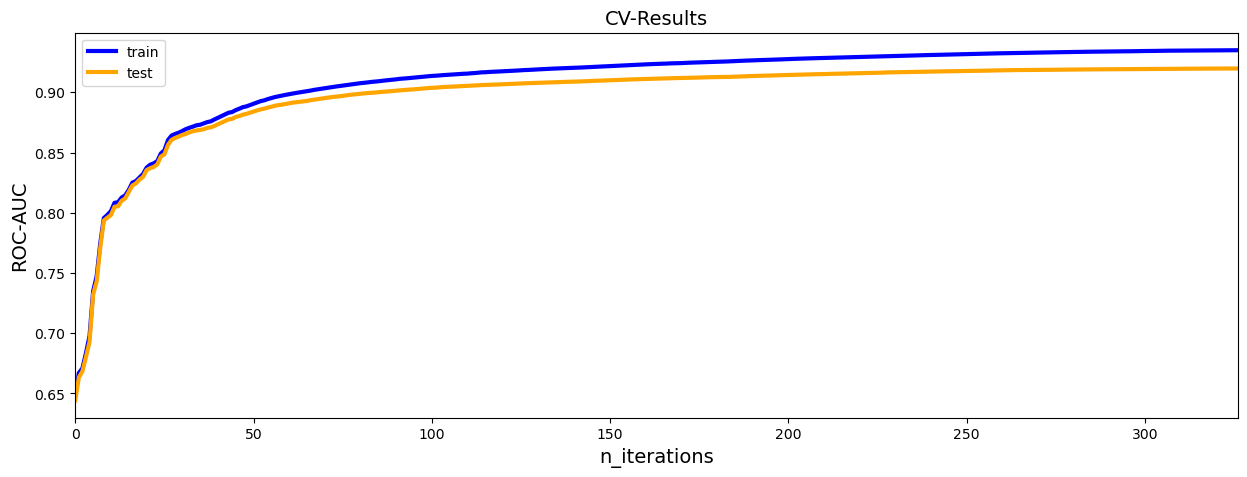

In [91]:
# draw_result(xgb_result_cat)

## Задание 4:
для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [108]:
# params = {
#     "booster": "gbtree",
#     "objective": "binary:logistic",
#     "eval_metric": "auc",
#     "learning_rate": 0.1,
#     # "n_estimators": 10000,
#     "reg_lambda": 50,
#     "max_depth": 4,
#     "gamma": 4,
#     "nthread": 6,
#     "seed": 27
# }

In [110]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 10000,
    # "reg_lambda": 50,
    # "max_depth": 4,
    "n_jobs": 6,
    "seed": 27
}

In [101]:
# params = {
#     "boosting_type": "gbdt",
#     "objective": "binary",
#     "metric": "auc",
#     "learning_rate": 0.01,
#     "n_estimators": 200,
#     "n_jobs": 6,
#     "seed": 27
# }

In [95]:
dtrain = lgb.Dataset(
    data=x_train, label=y_train
)
dvalid = lgb.Dataset(
    data=x_valid, label=y_valid
)

In [106]:
model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=25
)

[LightGBM] [Info] Number of positive: 5141, number of negative: 174859
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.139691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32181
[LightGBM] [Info] Number of data points in the train set: 180000, number of used features: 377
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028561 -> initscore=-3.526732
[LightGBM] [Info] Start training from score -3.526732
Training until validation scores don't improve for 50 rounds
[25]	training's auc: 0.915802	valid_1's auc: 0.84922
[50]	training's auc: 0.940841	valid_1's auc: 0.853306
[75]	training's auc: 0.952896	valid_1's auc: 0.854611
[100]	training's auc: 0.96145	valid_1's auc: 0.852862
[125]	training's auc: 0.970642	valid_1's auc: 0.849535
Early stopping, best iteration is:
[79]	training's auc: 0.954433	valid_1's auc: 0.855132


In [116]:
# lgb.cv?

In [113]:
lgb_result = lgb.cv(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    early_stopping_rounds=50,
    verbose_eval=25,
    stratified=True,
    metrics="auc",
    # maximize=True,
    shuffle=True,
    nfold=5,
)

[LightGBM] [Info] Number of positive: 4113, number of negative: 139887
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.111645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32181
[LightGBM] [Info] Number of data points in the train set: 144000, number of used features: 377
[LightGBM] [Info] Number of positive: 4113, number of negative: 139887
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.148132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32181
[LightGBM] [Info] Number of data points in the train set: 144000, number of used features: 377
[LightGBM] [Info] Number of positive: 4113, number of negative: 139887
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the over

In [115]:
len(lgb_result)

2

In [119]:
draw_result(lgb_result)

KeyError: 'train-auc-mean'

## Задание 5:
обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

In [ ]:
# params = {
#     "boosting_type": "gbdt",
#     "objective": "binary",
#     "metric": "auc",
#     "learning_rate": 0.01,
#     "n_estimators": 200,
#     "n_jobs": 6,
#     "seed": 27
# }

In [117]:
dtrain = lgb.Dataset(
    data=x_data_train_cat, label=y_train
)
dvalid = lgb.Dataset(
    data=x_data_test_cat, label=y_valid
)

In [118]:
model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=200,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=10
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5141, number of negative: 174859
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.150327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32239
[LightGBM] [Info] Number of data points in the train set: 180000, number of used features: 406
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028561 -> initscore=-3.526732
[LightGBM] [Info] Start training from score -3.526732
Training until validation scores don't improve for 50 rounds
[10]	training's auc: 0.891244	valid_1's auc: 0.853011
[20]	training's auc: 0.911385	valid_1's auc: 0.856739
[30]	training's auc: 0.925736	valid_1's auc: 0.859706
[40]	training's auc: 0.935555	valid_1's auc: 0.863171

In [ ]:
draw_result(model)

## Задание 6:
обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

In [ ]:
x_data_train_cat =  x_data_train.iloc[:]
x_data_test_cat =  x_data_test.iloc[:]

In [ ]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.01,
    "n_estimators": 200,
    "n_jobs": 6,
    "seed": 27
}

In [ ]:
dtrain = lgb.Dataset(
    data=x_data_train_cat, label=y_train
)
dvalid = lgb.Dataset(
    data=x_data_test_cat, label=y_valid
)

In [ ]:
model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=200,
    valid_sets=[dtrain, dvalid],
    categorical_feature=categorical,
    early_stopping_rounds=15,
    verbose_eval=10
)

In [ ]:
draw_result(model)

In [ ]:
categorical

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

## Задание 7:
для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [ ]:
cb_params = {
    "n_estimators": 200,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 10,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 50,
    "thread_count": 6,
    "random_seed": 42
}

In [ ]:
train_pool = cb.Pool(x_train, y_train)
valid_pool = cb.Pool(x_valid, y_valid)

In [ ]:
model = cb.CatBoostClassifier(**cb_params)
model.fit(train_pool, eval_set=valid_pool)

## Задание 8:
обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

In [ ]:
train_pool = cb.Pool(x_train, y_train)
valid_pool = cb.Pool(x_valid, y_valid)

In [ ]:
model = cb.CatBoostClassifier(**cb_params)
model.fit(train_pool, eval_set=valid_pool)

## Задание 9:
обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

In [ ]:
# cb_params = {
#     "n_estimators": 200,
#     "loss_function": "Logloss",
#     "eval_metric": "AUC",
#     "task_type": "CPU",
#     "max_bin": 20,
#     "verbose": 10,
#     "max_depth": 6,
#     "l2_leaf_reg": 100,
#     "early_stopping_rounds": 50,
#     "thread_count": 6,
#     "random_seed": 42
# }

In [ ]:
train_pool = cb.Pool(x_train, y_train, cat_features=categorical)
valid_pool = cb.Pool(x_valid, y_valid, cat_features=categorical)

In [ ]:
model = cb.CatBoostClassifier(**cb_params)
model.fit(train_pool, eval_set=valid_pool)

## Задание 10:
построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.